<h1 style="color: #AA1358;">ML Preprocessing</h1>

<h2 style="color: #A4064D;">Libraries</h2>

In [3]:
## Basic libraries
import pandas as pd 
import numpy as np 

## EDA Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Scaling Libraries
from sklearn.preprocessing import StandardScaler

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Import functions from utils
import sys
sys.path.append('./utils') 
from functions import *

<h2 style="color: #A4064D;">Loading Data</h2>

In [4]:
data = pd.read_csv('data/for_eda.csv').drop(columns=['Unnamed: 0']) 
df = data.copy()

# Display the first 10 rows of the DataFrame
df.head(10)


,id,age,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,total_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,total_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,total_cmp,complain,response
0,5524,67,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,0,1
1,2174,70,Graduation,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,59,Graduation,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,40,Graduation,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,43,PhD,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
5,7446,57,Master,Together,62513.0,1,2013-09-09,16,520,42,98,0,42,14,716,2,6,4,10,20,6,0,0,0,0,0,0,0,0
6,965,53,Graduation,Divorced,55635.0,1,2012-11-13,34,235,65,164,50,49,27,590,4,7,3,7,17,6,0,0,0,0,0,0,0,0
7,6177,39,PhD,Married,33454.0,1,2013-05-08,32,76,10,56,3,1,23,169,2,4,0,4,8,8,0,0,0,0,0,0,0,0
8,4855,50,PhD,Together,30351.0,1,2013-06-06,19,14,0,24,3,3,2,46,1,3,0,2,5,9,0,0,0,0,0,0,0,1
9,5899,74,PhD,Together,5648.0,2,2014-03-13,68,28,0,6,1,1,13,49,1,1,0,0,1,20,1,0,0,0,0,1,0,0


<h3 style="color: #6D183F;">Metadata</h3>

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **TotalCmp** - sum of capaigns accepted
- **Response** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of children in customer's household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

<h3 style="color: #6D183F;">Data Sneak Peak</h3>

In [5]:
# Show some info about the dataset

print("Data Overview:\n")
print(df.info())
print("\nNumber of variables per type:\n")
print(df.dtypes.value_counts())
print("\nNumber of missing values per column:\n")
print(df.isnull().sum())
print("\nDuplicated rows in the dataset:\n")
print(df.duplicated().sum())
print("\nNumber of unique values per column:\n")
print(df.nunique())

Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2236 non-null   int64  
 1   age                  2236 non-null   int64  
 2   education            2236 non-null   object 
 3   marital_status       2236 non-null   object 
 4   income               2236 non-null   float64
 5   childrenhome         2236 non-null   int64  
 6   dt_customer          2236 non-null   object 
 7   recency              2236 non-null   int64  
 8   wine_products        2236 non-null   int64  
 9   fruit_products       2236 non-null   int64  
 10  meat_products        2236 non-null   int64  
 11  fish_products        2236 non-null   int64  
 12  sweet_products       2236 non-null   int64  
 13  gold_products        2236 non-null   int64  
 14  total_products       2236 non-null   int64  
 15  deal_purchases       2

As we see at the sneak peak, our dataset it's pretty clean (because this csv was preprocessed in a previous project for an exhaustive Marketing Analysis).
- 2236 entries 
- 0 Missing values
- 0 duplicated rows
- Types: 25 integers (6 of them are booleans), 3 objects and 1 float

And for the unique values, we can notice that there are a few binary numerical variables, that should be better if we transform them into categorical booleans. 

In [6]:
# Before all, we will erase 'id' column, as it is not useful for our analysis
df.drop(columns=['id'], inplace=True)

# And also, let's drop 'dt_customer', as it is not useful for our analysis (it is not temporality about transtactions, its just the date when the customer was registered)
df.drop(columns=['dt_customer'], inplace=True)

In [7]:

# First, let's convert the binary columns to boolean type for better representation
binary_columns = ['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','complain','response']
df[binary_columns] = df[binary_columns].astype(bool)

# And then, lets see descriptive statistics for numerical and categorical variables
print("\nDescriptive statistics for numerical variables:\n")
num_var = df.select_dtypes(include=['int64', 'float64'])
print(num_var.describe())
print("\nDescriptive statistics for categorical variables:\n")
cat_var = df.select_dtypes(include=['object', 'bool'])  
print(cat_var.describe())


Descriptive statistics for numerical variables:

               age         income  childrenhome      recency  wine_products  \
count  2236.000000    2236.000000   2236.000000  2236.000000    2236.000000   
mean     55.203488   52228.004249      0.951252    49.147138     303.873435   
std      11.980604   25053.119141      0.751936    28.954880     336.876776   
min      28.000000    1730.000000      0.000000     0.000000       0.000000   
25%      47.000000   35502.500000      0.000000    24.000000      23.000000   
50%      54.000000   51498.500000      1.000000    49.000000     173.000000   
75%      65.000000   68289.750000      1.000000    74.000000     505.000000   
max     131.000000  666666.000000      3.000000    99.000000    1493.000000   

       fruit_products  meat_products  fish_products  sweet_products  \
count     2236.000000    2236.000000    2236.000000     2236.000000   
mean        26.271020     166.924419      37.405188       27.081395   
std         39.761356    

Look into describes about our variables for ML processing, we can notice a few insights:

- We should explore continuous variables in detail through plots. The describe functions give us some clues about outliers that could affect variable distribution.

- Variables about **acceptation campaigns** (the binary ones) are extreamly incline to rejection. It seems that it will be better if we earse them.

- It should be good to do some EDA through our features, grouping into numerical/categorical and for feature context meaning (demographics, consumer behavior, etc...)

<h2 style="color: #A4064D;">Featuring Engineer</h2>

Let's check variable distribution, first numericals and then, categoricals

<h4 style="color: #A4064D;">Numerical Features</h2>

Dataset context give us a clear classification about our series. In case of continuous ones, there are some variables that speaks about demographics, some about consumer preferences and others about consume behaviour. So let's pairplott them separately

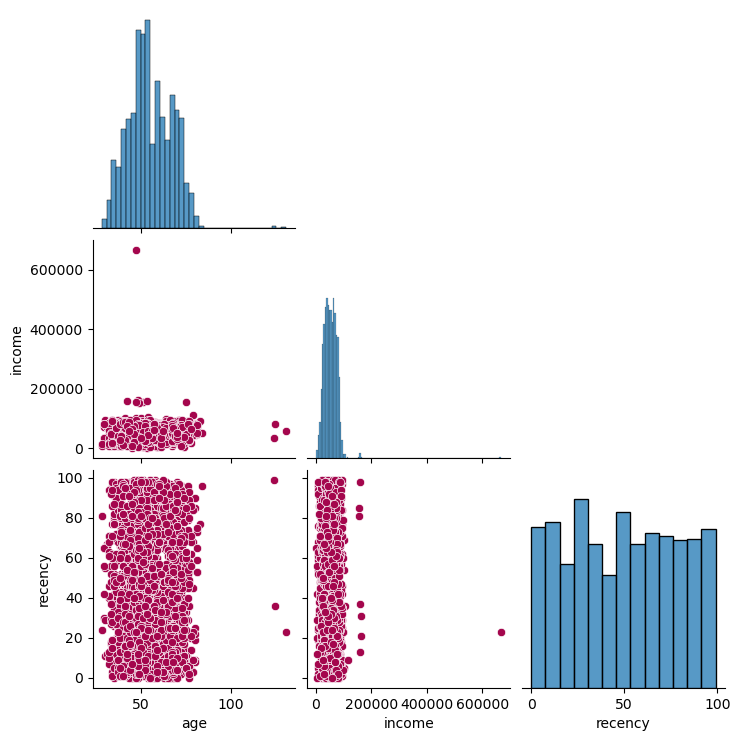

In [8]:
#First, let's visualize demographic variables using pairplot

pairplotter(num_var[['age', 'income', 'recency']], hue=None, size=2.5)

- We exclude **'childrenathome'** from this visual, because its condition of numerical discrete
- **'income'** and **'age'** have inusual high values (as we saw in description steps before), rest of variables looks like has normalish values. Let's proceed to earse those outliers.
- **'recency'** has a extremly uniform distribution. It's not going to contribute too much to our model. It's a candidate to not be consider for feature selection. 

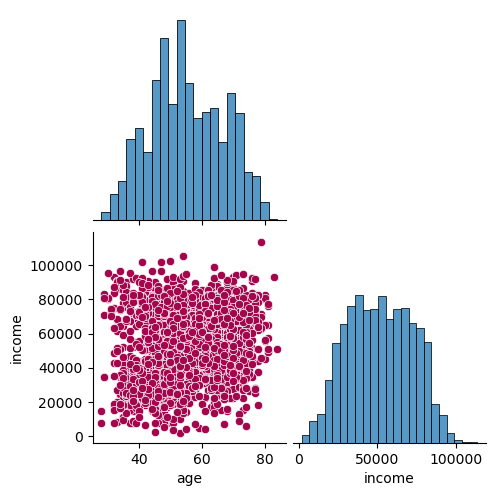

In [9]:
# Let's proceed to erase 'age' and 'income' outliers
# We will use the IQR method to detect outliers

df = remove_outliers_iqr(df, 'age')
df = remove_outliers_iqr(df, 'income')

# Let's visualize the numerical variables again after removing outliers
pairplotter(df[['age', 'income']], hue=None, size=2.5)

This should be enough to have normalish distribution for a better ML performance.

There's no clear patterns between **age** and **income**. Not linearity, either visual correlation. 

Now let's have a look to consumer preferences

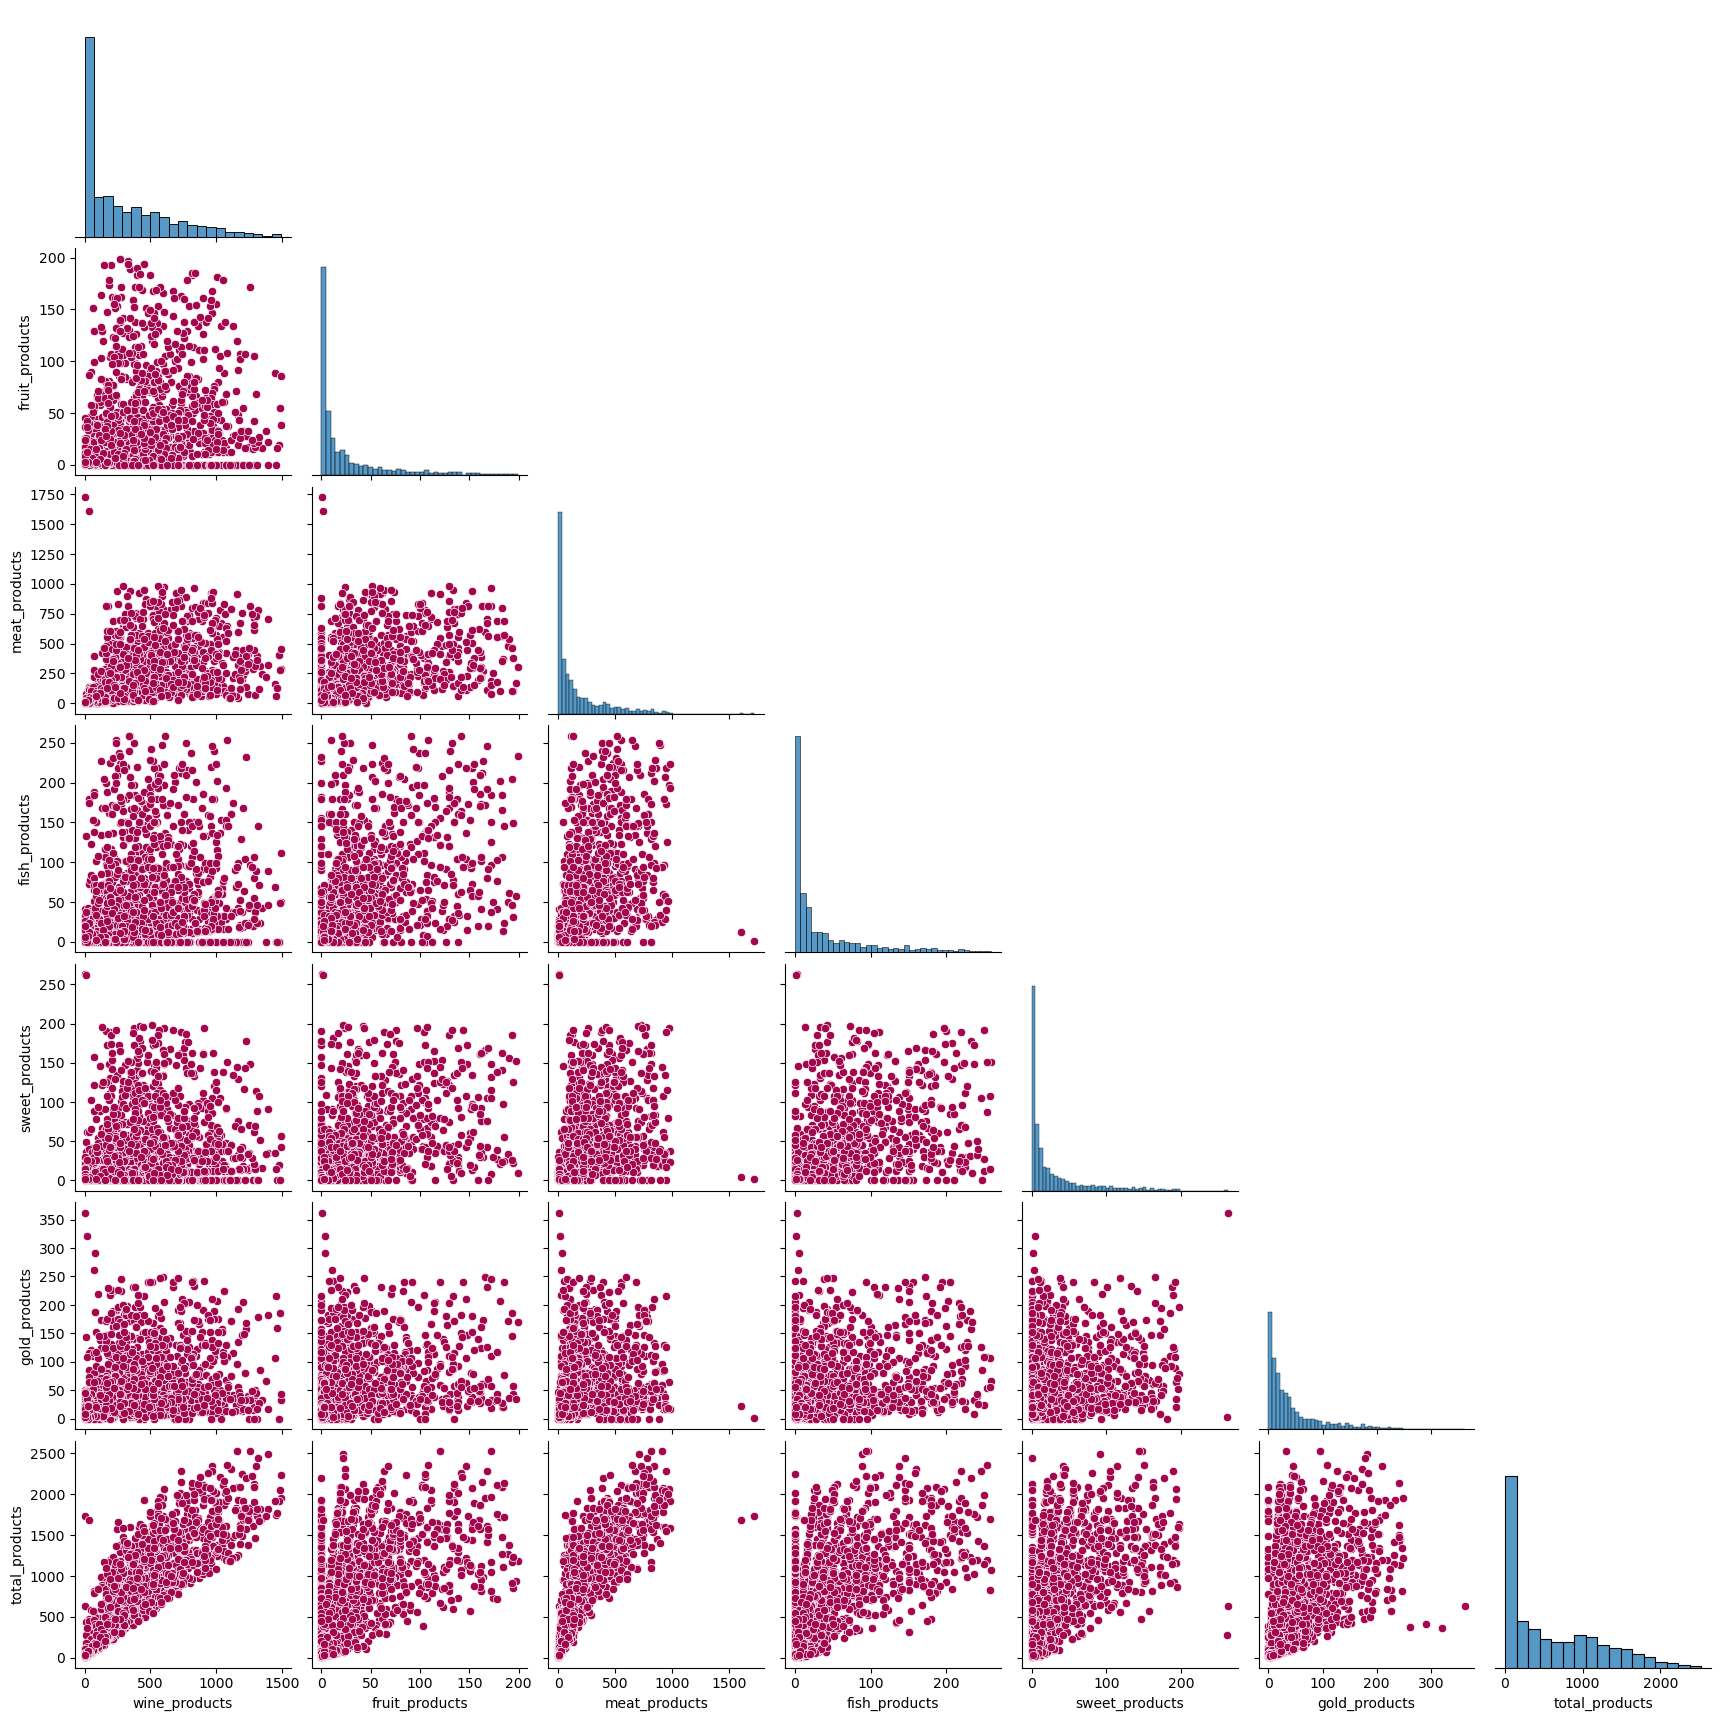

In [10]:
# Select specific variables from num_var related with consumer preferences

pairplotter(df[['wine_products', 'fruit_products', 'meat_products', 'fish_products', 'sweet_products', 'gold_products', 'total_products']], hue=None, size=2.5)

- All products preferences have clear positive skewness, this reveils that customers tends to obtain lesser amounts of each products in general
- Relation between total amounts and specific products reveals that **meat** and **wine** are the categories with more lineality.
- Observing them, we can appreciate that **meat**, **sweet** and **gold** has very high values. It would be better if we clean them from this outliers,

In [11]:
# Let's clean from outliers this specific variables, but this time we will use upper bound with 90% quantile

df = remove_outliers_upper_quantile(df, 'meat_products', quantile=0.90)
df = remove_outliers_upper_quantile(df, 'sweet_products', quantile=0.90)
df = remove_outliers_upper_quantile(df, 'gold_products', quantile=0.90)

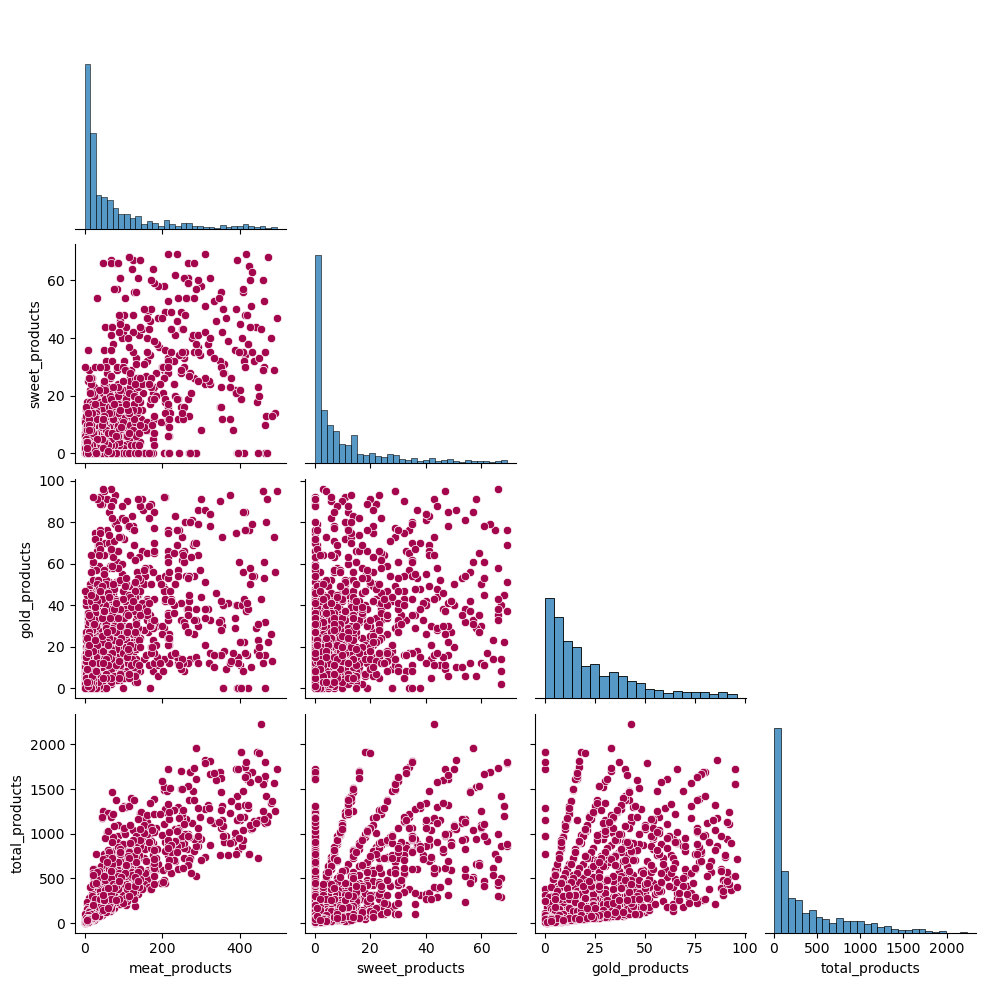

In [12]:
# Let's visualize them again after removing outliers

pairplotter(df[['meat_products', 'sweet_products', 'gold_products', 'total_products']], hue=None, size=2.5)

This should be enough for the cosumer preferences. Now without prominent outliers there's more uniform spread data.

Let's address for consumer behavior ones. Now we will deal with numerical discrete

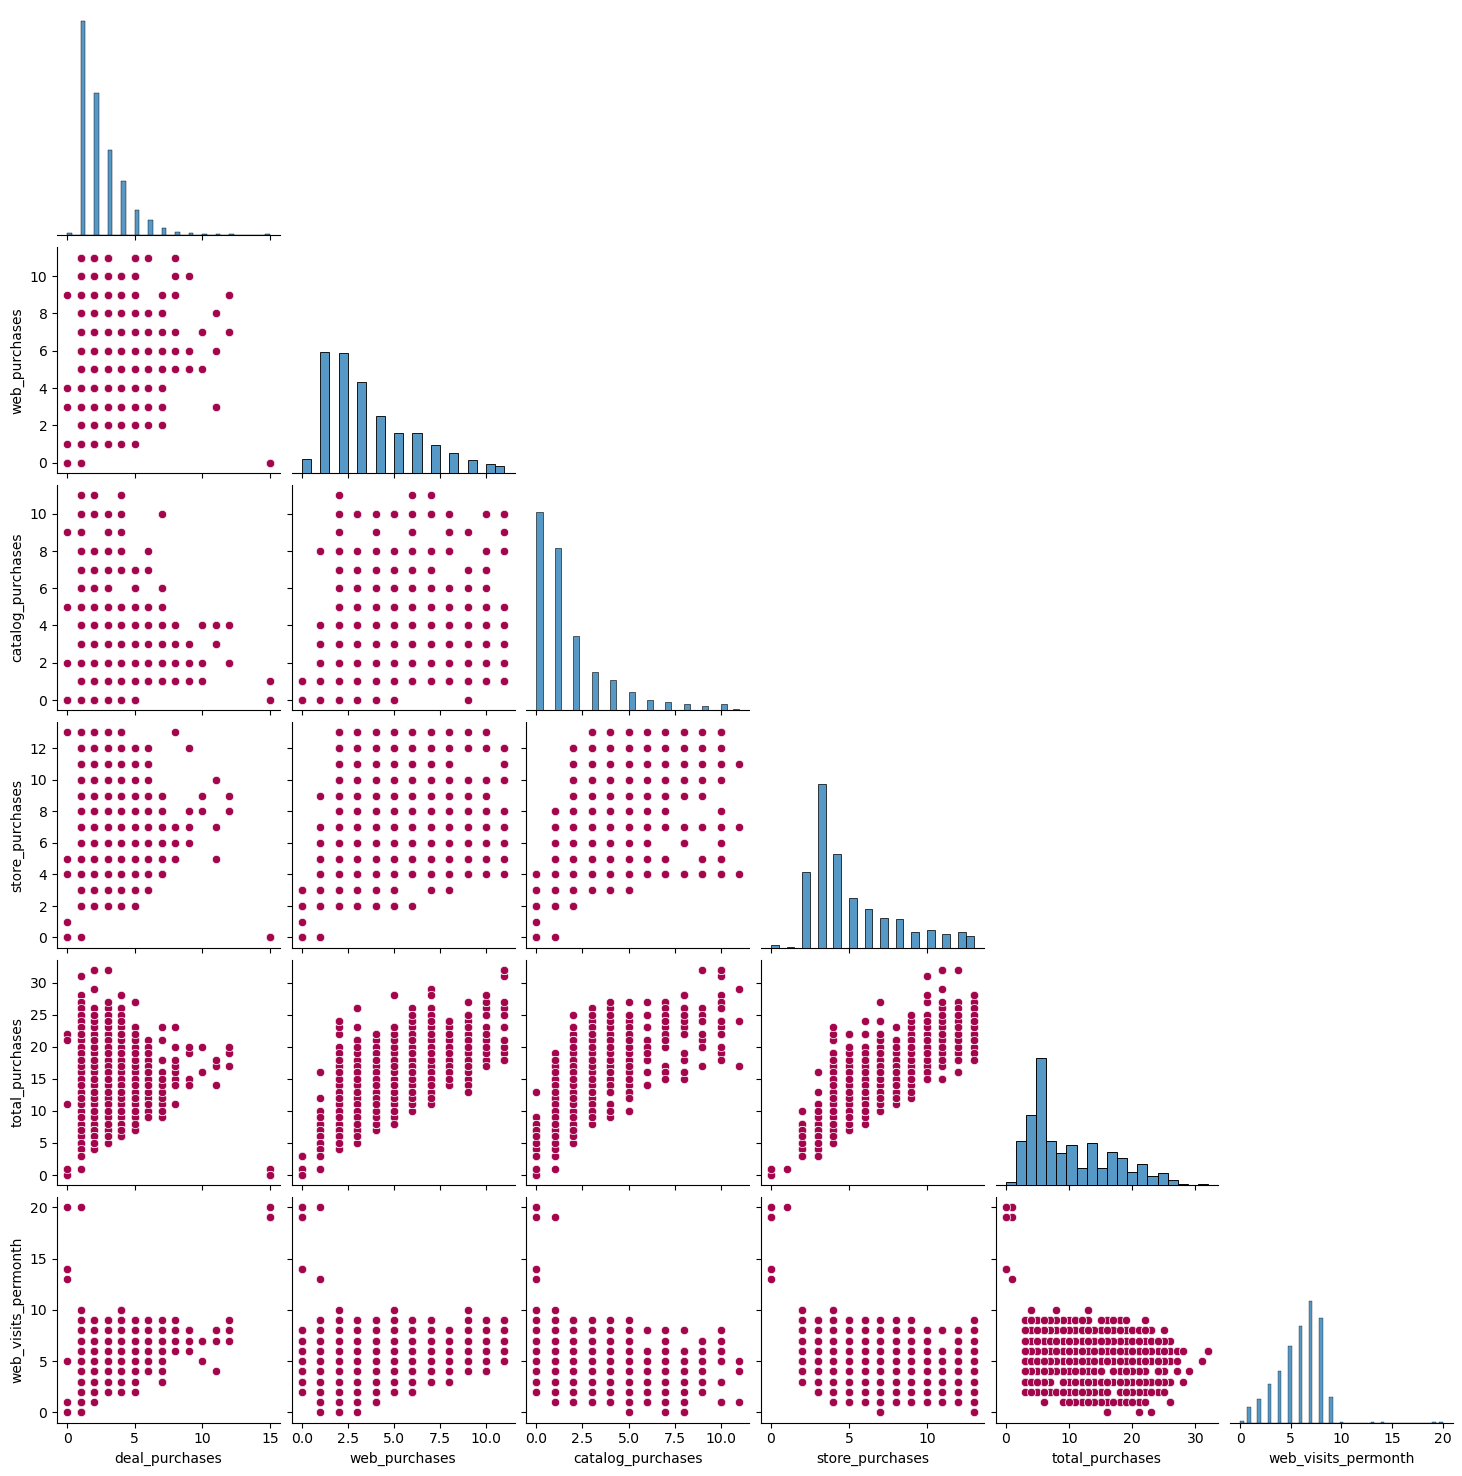

In [13]:
# Select them. They are a bunch of discrete variables

pairplotter(df[['deal_purchases', 'web_purchases', 'catalog_purchases', 'store_purchases', 'total_purchases', 'web_visits_permonth',]], hue=None, size=2.5)

- Not too much to appreciate. Mayority of distributions are normal with skewness to the left, concetrating the values in low marks like patterns observed in other aspects of this dataset.
- Only **web_visits_permonth** seems that have prominent outliers, we can deal with them

In [14]:
# We will use our 90% upper quantile method for this specific variable

df = remove_outliers_upper_quantile(df, 'web_visits_permonth', quantile=0.90)

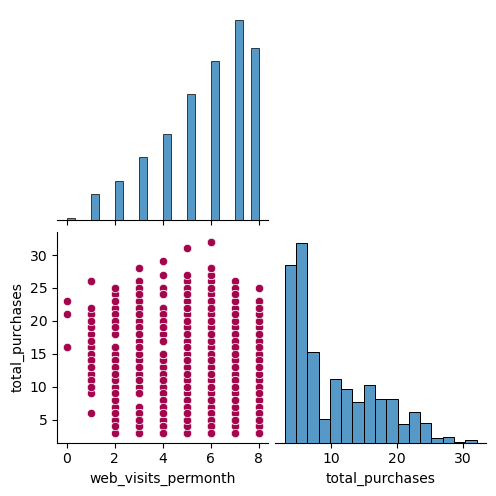

In [15]:
# Let's visualize a pairplot of web visits per month and total purchases after removing outliers
pairplotter(df[['web_visits_permonth', 'total_purchases']], hue=None, size=2.5)

That would be enough for behaviour

<h4 style="color: #A4064D;">Categorical Features</h2>

In [16]:
# Let's have a peek at categorical variables

cat_var.head(10)

,education,marital_status,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,Graduation,Single,False,False,False,False,False,False,True
1,Graduation,Single,False,False,False,False,False,False,False
2,Graduation,Together,False,False,False,False,False,False,False
3,Graduation,Together,False,False,False,False,False,False,False
4,PhD,Married,False,False,False,False,False,False,False
5,Master,Together,False,False,False,False,False,False,False
6,Graduation,Divorced,False,False,False,False,False,False,False
7,PhD,Married,False,False,False,False,False,False,False
8,PhD,Together,False,False,False,False,False,False,True
9,PhD,Together,True,False,False,False,False,False,False


We only have a few categoricals, distributed into two context groups

First, let's explore the demographic one's: **education** and **marital_status**

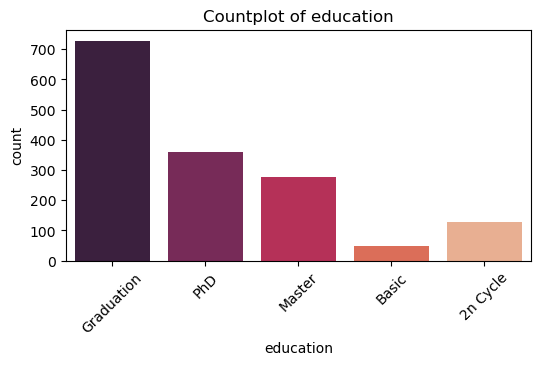

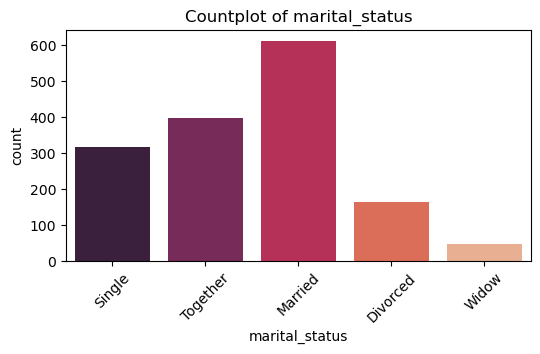

In [17]:
# They are categorical variables, so we will use countplot to visualize them

countplotter(df[['education', 'marital_status']], hue=None, palette='rocket')

In this two categorical features, there are predominant categories that left others with very few counts. This could be a problem because in a clustering model, the prediction could lean to those big categories.

To solve this, we could regroup some categories to unify them and balance the data

In [18]:
# Let's map values in 'education' into 3 principal labels to balance the categories

education_mapping = {
    'Basic': 'Basic Education',
    'Graduation': 'Basic Education',
    'Master': 'Higher Education',
    'PhD': 'Higher Education',
    '2n Cycle': 'Higher Education'
}

df['education'] = df['education'].map(education_mapping)

In [19]:
# And do the same for 'marital_status' to balance the categories

marital_mapping = {
    'Single': 'Single',
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single'
}

df['marital_status'] = df['marital_status'].map(marital_mapping)

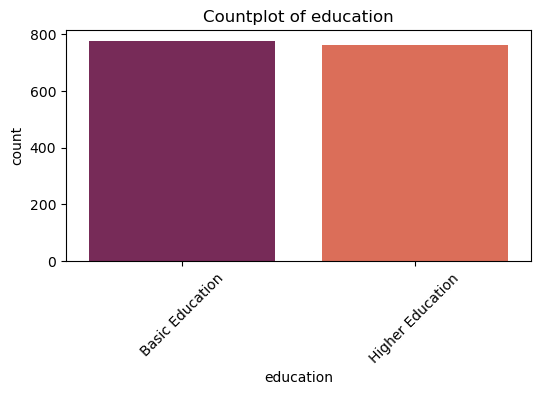

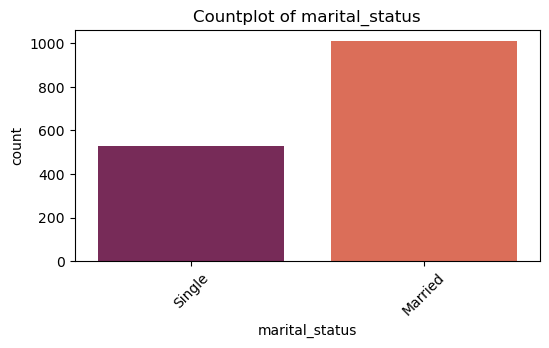

In [20]:
# Let's visualize the categorical variables again after mapping

countplotter(df[['education', 'marital_status']], hue=None, palette='rocket')

Adding those minor categories to the main ones could help us balance the data and reduce dimensionality, making the clustering model more robust and interpretable.

Once we have deal with demographic ones, let's explore the others variable that speaks about marketing campaing acceptation

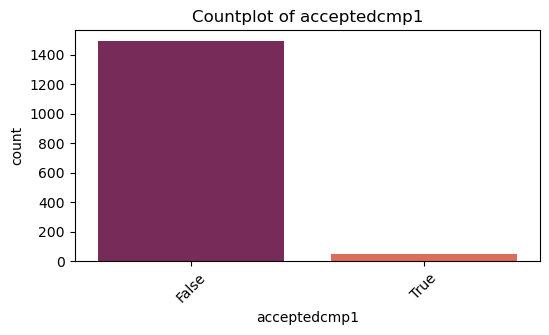

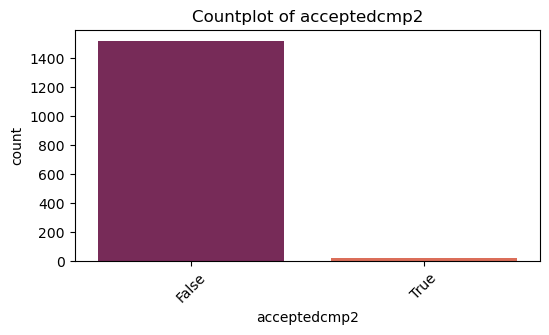

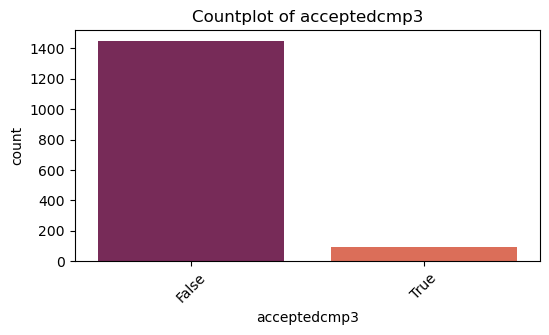

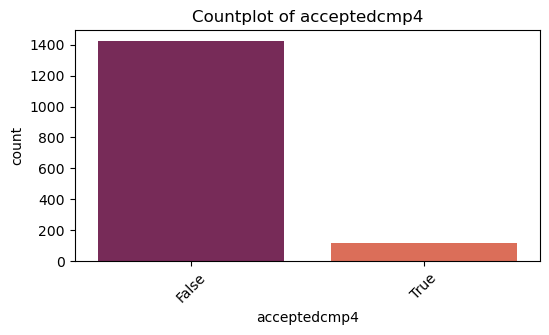

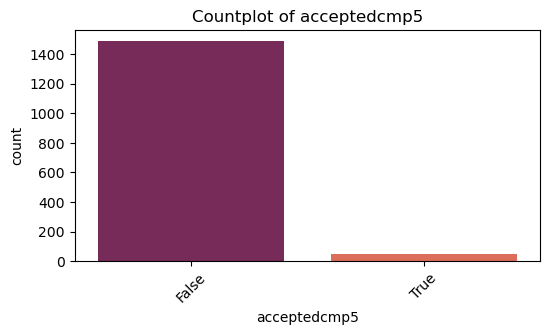

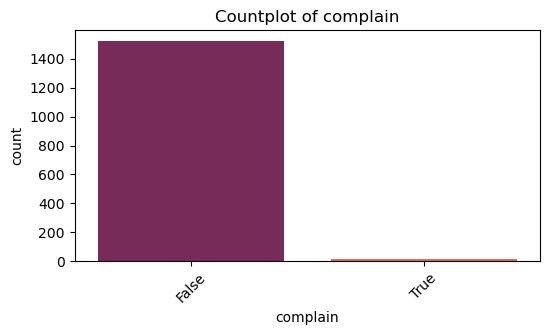

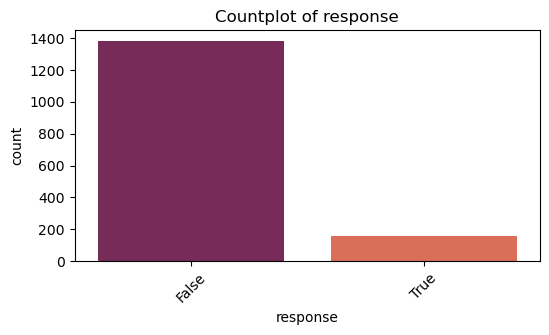

In [21]:
countplotter(df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response']], hue=None, palette='rocket')    

The acceptation campaign responses are pure noise for our model. The reject of campaigns are very extreme that there's no patterns to read on it, it's too much imbalance.

So we better erase this variables for the good of our ML model.

<h4 style="color: #A4064D;">Transforming Categorical to Numericals</h2>

In [22]:
# First, let's create a new dataframe with the columns we want to manipulate

df_categorical = df[['marital_status', 'education']].copy()

In [23]:
#Now, let's create dummy variables for 'marital_status' and 'education' columns

df_categorical = pd.get_dummies(df_categorical, columns=['marital_status', 'education'], drop_first=True)

# Display the first 10 rows of the new DataFrame with dummy variables
df_categorical.head(10)

,marital_status_Single,education_Higher Education
1,True,False
2,False,False
3,False,False
4,False,True
5,False,True
6,True,False
7,False,True
10,False,False
11,False,False
13,True,True


Applying one-hot encoding to this couple of binary variables are enough

Now, the next step in this featuring engineering it's to normalize our continuous features.

<h4 style="color: #A4064D;">Normalizing/Standarizing Continuous Features</h2>

In this case (clustering model) we are going to proceed with Standarization (StandardScaler), because it's the most commong and safe to deal with numerical features for cluster models.

In [24]:
# As we did with the categorical variables, first we will create a new dataframe with the columns we want to manipulate
df_numerical = df[['income', 'age', 'childrenhome', 'wine_products', 'fruit_products', 'meat_products',
       'fish_products', 'sweet_products', 'gold_products', 'total_products', 'deal_purchases', 'web_purchases', 'catalog_purchases',
       'store_purchases', 'total_purchases', 'web_visits_permonth']]

In [25]:
# Once we got the new dataframe, we will scale the numerical variables using MinMaxScaler

scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

In [26]:
# Next strep is to concatenate the scaled numerical variables with the dummy variables created from categorical variables
df_final = pd.concat([df_numerical_scaled.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis=1)

In [27]:
# And let's display the first 10 rows of the final DF to have a peek at the final result
df_final.head(10)

,income,age,childrenhome,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,total_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,total_purchases,web_visits_permonth,marital_status_Single,education_Higher Education
0,0.045799,1.300757,1.193302,-0.689513,-0.509498,-0.683019,-0.510580,-0.647551,-0.766724,-0.782792,-0.220196,-0.988863,-0.328846,-1.049477,-0.962680,-0.375633,True,False
1,1.464431,0.331833,-1.572785,0.689431,1.418097,0.446412,2.555898,0.653642,0.871083,0.950170,-0.807131,1.828310,0.135159,1.716161,1.521030,-0.896574,False,False
2,-1.060069,-1.341764,-0.189741,-0.689513,-0.389023,-0.552341,-0.285517,-0.517431,-0.812218,-0.722636,-0.220196,-0.586409,-0.792851,-0.358067,-0.652216,0.145308,False,False
3,0.716630,-1.077512,-0.189741,-0.151226,1.177148,0.362405,0.727265,1.044000,-0.357272,0.131120,1.540610,0.620950,0.599164,0.333342,0.589639,-0.375633,False,True
4,0.953546,0.155665,-0.189741,1.001770,1.136989,0.175722,-0.566845,2.019894,-0.402767,0.811348,-0.220196,1.023403,1.063169,1.716161,1.521030,0.145308,False,True
5,0.567407,-0.196671,-0.189741,0.054784,2.060628,0.791776,0.839796,2.475312,0.188664,0.519821,0.953674,1.425857,0.599164,0.679047,1.055335,0.145308,True,False
6,-0.677860,-1.429848,-0.189741,-0.473534,-0.148074,-0.216312,-0.482447,-0.647551,0.006685,-0.454247,-0.220196,0.218497,-0.792851,-0.358067,-0.341752,1.187190,False,True
7,0.364934,-1.253680,-0.189741,-0.709449,-0.348865,-0.683019,-0.566845,-0.582491,-0.994197,-0.801302,-0.807131,-0.988863,-0.792851,-1.049477,-1.117912,0.666249,False,False
8,-2.134948,-0.637091,-1.572785,-0.706126,0.092876,-0.636348,-0.257384,-0.647551,-0.311777,-0.704126,-0.807131,-0.586409,-0.792851,-0.703772,-0.807448,1.187190,False,False
9,0.776196,1.476925,1.193302,0.048139,-0.469339,-0.244314,-0.482447,-0.387312,-0.402767,-0.128015,0.366739,1.023403,-0.328846,-0.012363,0.279175,0.145308,True,True


<h4 style="color: #A4064D;">Correlations and Multicollinearity</h2>

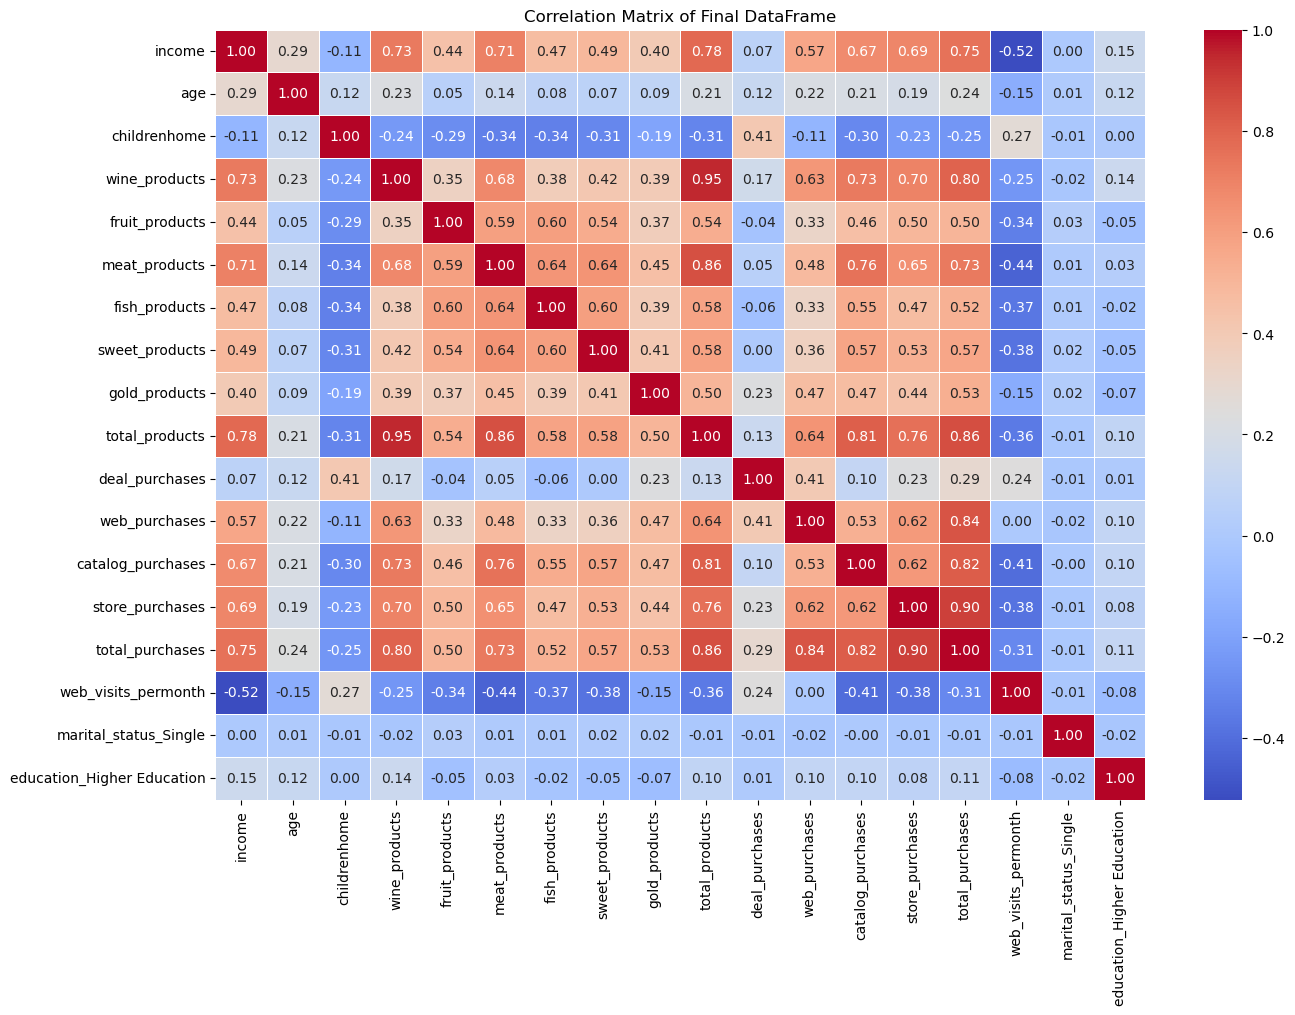

In [28]:
# Let's observe the correlation matrix of the final DataFrame

plt.figure(figsize=(15, 10))
sns.heatmap(df_final.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)   
plt.title('Correlation Matrix of Final DataFrame')
plt.show()

- We can observe extremly high correlationm between **total_products** and **wine_products**. And also **total_products** and **meat_products**. These patterns indicates that wine and meat (which are high correlated between them aswell) contains the same information that total products
- **total_purchases** is extremly high correlated with **store_purchases**, **web_purchases** and **store_purchase**.
- **total_products** and **total_purchases** have their data represented for other features, so it's redundant to use them into our model.

In [29]:
# So thanks to the correlation matrix, we can see that there are a couple of variables that is better to drop, as they are highly correlated with others

df_final.drop(columns=['total_products', 'total_purchases' ], inplace=True)

<h2 style="color: #A4064D;">Export CSV</h2>

In [30]:
# Finally, let's save the final DataFrame to a CSV file for further development of the model
df_final.to_csv('data/cleaned_data.csv', index=False)

In [31]:
# For further analysis, we will also export a version of the final dataframe but without scaling

df_final_no_scaling = pd.concat([df_numerical.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis=1)

df_final_no_scaling.to_csv('data/cleaned_data_no_scaling.csv', index=False)